# DBN with pyAGrum

This notebook was created based on this tutorial: http://www-desir.lip6.fr/~phw/aGrUM/docs/last/notebooks/32-dynamicBn.ipynb.html

In [45]:
import os
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pyAgrum.lib.dynamicBN as gdyn
%matplotlib inline

## Creating the BN model

In [46]:
twodbn = gum.BayesNet()

## Creating Nodes

Note the naming convention for a 2TBN : a variable with a name A is present at t=0 with the name A0 and at time t as At.(From the tutorial)

### Subjects nodes

In [47]:
# Subjects nodes
subjects_nodes = ['ca0', 'co0', 'h0', 'cat', 'cot', 'ht']

[
    twodbn.add(gum.LabelizedVariable(s, s, 2)) 
    for s in subjects_nodes
]

[0, 1, 2, 3, 4, 5]

### Evidences nodes

In [48]:
evidences_nodes = ['evca0', 'evco0', 'evh0', 'evcat', 'evcot', 'evht']

[
    twodbn.add(gum.LabelizedVariable(s, s, 2)) 
    for s in evidences_nodes
]

[6, 7, 8, 9, 10, 11]

## Creating Arcs

### Subjects Arcs

In [49]:
twodbn.addArc('ca0', 'h0')
twodbn.addArc('co0', 'h0')
twodbn.addArc('cat', 'ht')
twodbn.addArc('cot', 'ht')

### Evidences Arcs

In [50]:
twodbn.addArc('ca0', 'evca0')
twodbn.addArc('co0', 'evco0')
twodbn.addArc('h0', 'evh0')
twodbn.addArc('cat', 'evcat')
twodbn.addArc('cot', 'evcot')
twodbn.addArc('ht', 'evht')

### Transitions Arcs

In [51]:
twodbn.addArc('ca0', 'cat')
twodbn.addArc('co0', 'cot')
twodbn.addArc('h0', 'ht')

## Creating the CPTs for subjects, evidences and transitions

Method orders for probabilities
.fillWith([False, True])

### Subjects CPTs

In [52]:
twodbn.cpt('ca0').fillWith([0.5, 0.5])
twodbn.cpt('co0').fillWith([0.5, 0.5])
twodbn.cpt('h0')[{'ca0': 0, 'co0': 0}] = [0.9, 0.1]
twodbn.cpt('h0')[{'ca0': 0, 'co0': 1}] = [0.65, 0.35]
twodbn.cpt('h0')[{'ca0': 1, 'co0': 0}] = [0.65, 0.35]
twodbn.cpt('h0')[{'ca0': 1, 'co0': 1}] = [0.2, 0.8]

### Evidences CPTs

In [53]:
twodbn.cpt('evca0')[{'ca0': 0}] = [0.8, 0.2]
twodbn.cpt('evca0')[{'ca0': 1}] = [0.1, 0.9]

twodbn.cpt('evco0')[{'co0': 0}] = [0.8, 0.2]
twodbn.cpt('evco0')[{'co0': 1}] = [0.1, 0.9]

twodbn.cpt('evh0')[{'h0': 0}] = [0.8, 0.2]
twodbn.cpt('evh0')[{'h0': 1}] = [0.1, 0.9]

twodbn.cpt('evcat')[{'cat': 0}] = [0.8, 0.2]
twodbn.cpt('evcat')[{'cat': 1}] = [0.1, 0.9]

twodbn.cpt('evcot')[{'cot': 0}] = [0.8, 0.2]
twodbn.cpt('evcot')[{'cot': 1}] = [0.1, 0.9]

twodbn.cpt('evht')[{'ht': 0}] = [0.8, 0.2]
twodbn.cpt('evht')[{'ht': 1}] = [0.1, 0.9]

### Transitions CPTs

In [54]:
# Transitions CTPs
twodbn.cpt('cat')[{'ca0': 0}] = [0.999, 0.001]
twodbn.cpt('cat')[{'ca0': 1}] = [0.001, 0.999]

twodbn.cpt('cot')[{'co0': 0}] = [0.99, 0.01]
twodbn.cpt('cot')[{'co0': 1}] = [0.01, 0.99]

twodbn.cpt('ht')[{'cat': 0, 'cot': 0, 'h0': 0}] = [0.9, 0.1]
twodbn.cpt('ht')[{'cat': 0, 'cot': 0, 'h0': 1}] = [0.85, 0.15]
twodbn.cpt('ht')[{'cat': 0, 'cot': 1, 'h0': 0}] = [0.85, 0.15]
twodbn.cpt('ht')[{'cat': 0, 'cot': 1, 'h0': 1}] = [0.35, 0.65]
twodbn.cpt('ht')[{'cat': 1, 'cot': 0, 'h0': 0}] = [0.85, 0.15]
twodbn.cpt('ht')[{'cat': 1, 'cot': 0, 'h0': 1}] = [0.35, 0.65]
twodbn.cpt('ht')[{'cat': 1, 'cot': 1, 'h0': 0}] = [0.35, 0.65]
twodbn.cpt('ht')[{'cat': 1, 'cot': 1, 'h0': 1}] = [0.1, 0.9]

### Save DBN as a file

In [55]:
gum.saveBN(twodbn,os.path.join("out","DBN.bif"))

## Visualizing the DBN

### DBN with 0 and 1 time slices

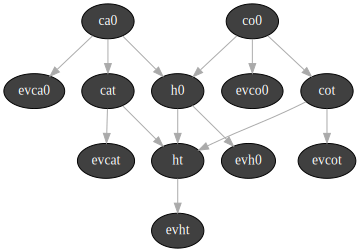

In [56]:
import pyAgrum.lib.notebook as gnb

gnb.forDarkTheme()

gnb.showBN(twodbn)

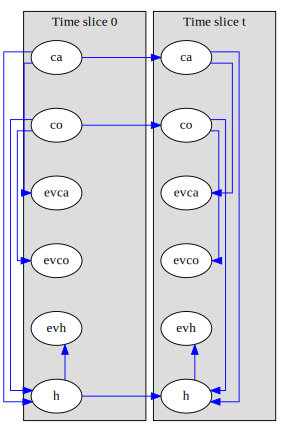

In [57]:
gdyn.showTimeSlices(twodbn)

### DBN expanded with 5 time slices

In [58]:
twodbn.cpt('co0')

(gum::Potential<double>@0x38aaca0) <co0:0> :: 0.5 /<co0:1> :: 0.5

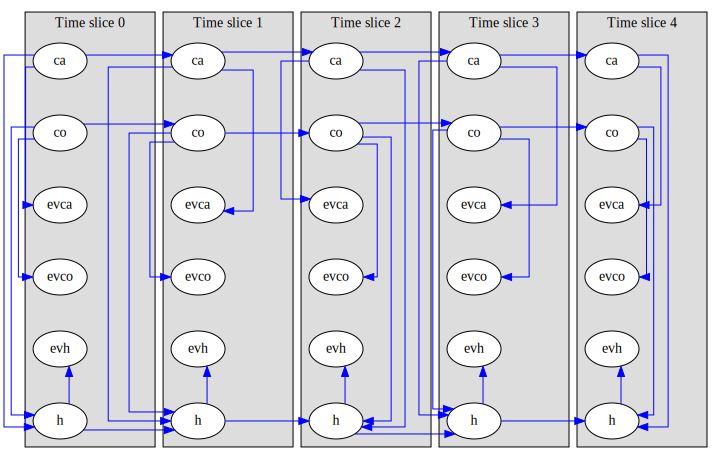

In [59]:
T=5

dbn = gdyn.unroll2TBN(twodbn,T)
gdyn.showTimeSlices(dbn, size="10")

## DBN Inference

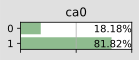

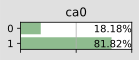

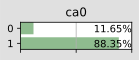

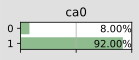

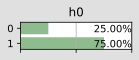

None


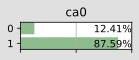

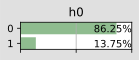

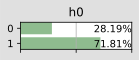

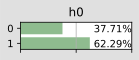

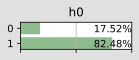

In [60]:
T = 5

#for i in range(T):
#    gnb.showPosterior(dbn,target="ca{}".format(i),evs={})
    
gnb.showPosterior(dbn, target="ca0", evs={'evca0': 1})
gnb.showPosterior(dbn, target="ca0", evs={'evca0': 1, 'evco0': 0})
gnb.showPosterior(dbn, target="ca0", evs={'evca0': 1, 'evh0': 1})
gnb.showPosterior(dbn, target="ca0", evs={'evca0': 1, 'h0': 1})
a = gnb.showPosterior(dbn, target="h0", evs={'evh0': 1})
print(a)
gnb.showPosterior(dbn, target="ca0", evs={'evca0': 1, 'h0': [0.2193, 0.7807]})

gnb.showPosterior(dbn, target="h0", evs={'evh0': 0, 'ca0': [0.1636, 0.8364], 'evca0': 1})
gnb.showPosterior(dbn, target="h0", evs={'evh0': 1, 'ca0': [0.8757, 0.1243], 'evca0': 1})
gnb.showPosterior(dbn, target="h0", evs={'evh0': 1, 'ca0': [0.8757, 0.1243]})
gnb.showPosterior(dbn, target="h0", evs={'evh0': 1, 'evca0': 1})


### Following variables

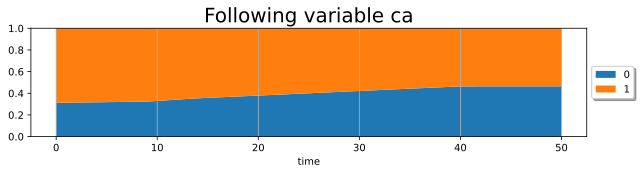

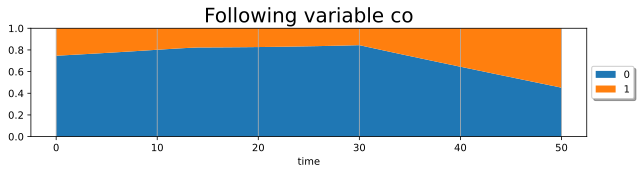

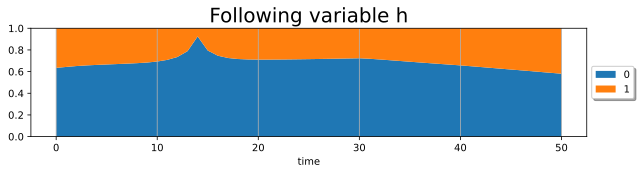

In [61]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 2)
gdyn.plotFollow(
    ["ca","co","h"],
    twodbn,
    T=51,
    evs={
        'evca1': 1,
        'evca9': 1,
        'evco30': 0,
        'evh14': 0,
        'evca40': 0,
        'evco50': 1
    }
)

## nsDBN (Non-Stationnary Dynamic Bayesian Network)

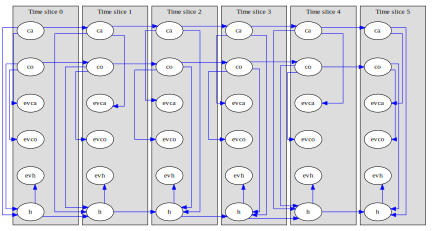

In [62]:
T = 6

dbn = gdyn.unroll2TBN(twodbn,T)
gdyn.showTimeSlices(dbn)

Non-stationnaty DBN allows to express that the dBN do not follow the same 2TBN during all steps. A unrolled dbn is a classical BayesNet and then can be changed as you want after unrolling. (Extracted from tutorial)

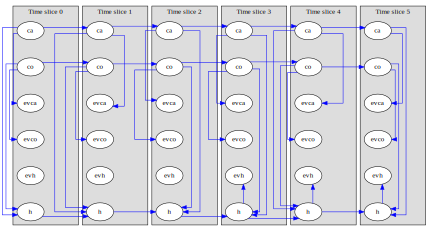

In [63]:
for i in range(3):
    dbn.eraseArc(f"h{i}",f"evh{i}")

gum.saveBN(twodbn,os.path.join("out","DBN.bif"))
    
gdyn.showTimeSlices(dbn)

In [64]:
# gnb.showPosterior(dbn, target="h0", evs={'evh0': 1, 'evhd0': 1})
# gnb.showPosterior(dbn, target="h0", evs={'evh0': 1, 'evhd0': 0})

# gnb.showPosterior(dbn, target="h4", evs={'evh0': 1, 'evh1': 1, 'evh2': 1, 'evh3': 1, 'evh4': 1, 'evhd4': 0})
# gnb.showPosterior(dbn, target="h3", evs={'evh0': 1, 'evhd4': 0})

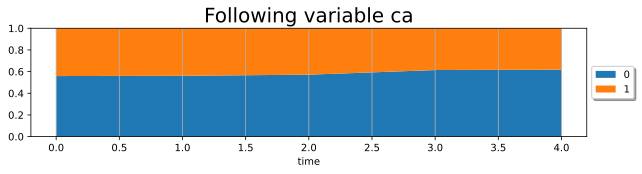

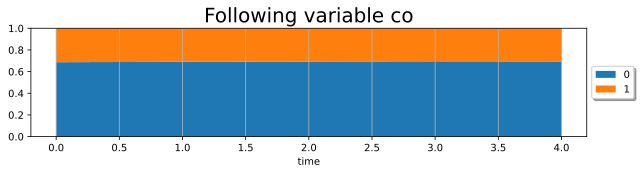

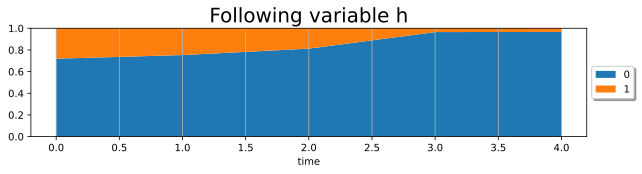

In [65]:
plt.rcParams['figure.figsize'] = (10, 2)
gdyn.plotFollowUnrolled(["ca","co","h"],dbn,T=5, evs={'evca0': 1, 'evh0': 1, 'evca1': 1, 'evh1': 1, 'evca2': 1, 'evh2': 1, 'evca3': 0, 'evh3': 0, 'evca4': 0, 'evh4': 0})

In [66]:
ie = gum.LazyPropagation(dbn)

In [67]:
ie

<pyAgrum.pyAgrum.LazyPropagation; proxy of <Swig Object of type 'gum::LazyPropagation< double > *' at 0x7fae8303fe40> >

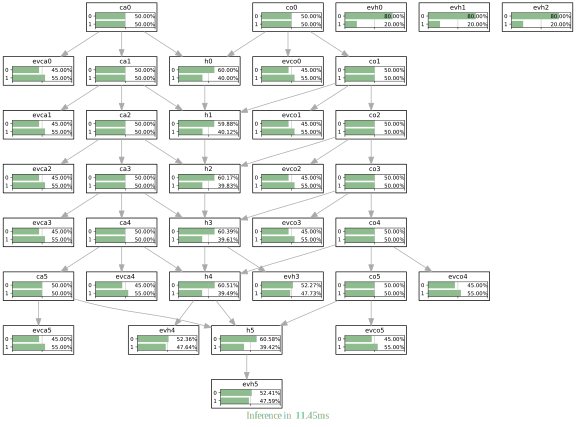

In [68]:
gnb.showInference(dbn,evs={})

In [69]:
ie = gum.VariableElimination(dbn)
ie.setEvidence({'evca0': 1, 'evh0': 1})
ie.makeInference()
ie.posterior('ca0')

(gum::Potential<double>@0x3c38710) <ca0:0> :: 0.181818 /<ca0:1> :: 0.818182

In [70]:
ie = gum.VariableElimination(dbn)
ie.setEvidence({'evca0': 1, 'evh0': 1, 'evca1': 1, 'evh1': 1})
ie.makeInference()
ie.posterior('ca1')

(gum::Potential<double>@0x415e820) <ca1:0> :: 0.0472508 /<ca1:1> :: 0.952749

In [71]:
ie = gum.VariableElimination(dbn)
ie.setEvidence({'evca0': 1, 'evh0': 1, 'evca1': 1, 'evh1': 1, 'evca2': 1, 'evh2': 1})
ie.makeInference()
ie.posterior('ca2')

(gum::Potential<double>@0x3a58770) <ca2:0> :: 0.0111178 /<ca2:1> :: 0.988882

In [72]:
ie = gum.VariableElimination(dbn)
ie.setEvidence({'evca0': 1, 'evh0': 1, 'evca1': 1, 'evh1': 1, 'evca2': 1, 'evh2': 1, 'evca3': 0, 'evh3': 0})
ie.makeInference()
ie.posterior('ca3')

(gum::Potential<double>@0x3abc4d0) <ca3:0> :: 0.140239 /<ca3:1> :: 0.859761

In [73]:
ie = gum.VariableElimination(dbn)
ie.setEvidence({'evca0': 1, 'evh0': 1, 'evca1': 1, 'evh1': 1, 'evca2': 1, 'evh2': 1, 'evca3': 0, 'evh3': 0, 'evca4': 0, 'evh4': 0})
ie.makeInference()
ie.posterior('ca4')

(gum::Potential<double>@0x395b7c0) <ca4:0> :: 0.618193 /<ca4:1> :: 0.381807

In [74]:
ie = gum.VariableElimination(dbn)
ie.setEvidence({'evca0': 0, 'evh0': 0, 'evca1': 0, 'evh1': 0, 'evca2': 0, 'evh2': 0, 'evca3': 1, 'evh3': 1, 'evca4': 1, 'evh4': 1})
ie.makeInference()
ie.posterior('ca4')

(gum::Potential<double>@0x3b36350) <ca4:0> :: 0.845328 /<ca4:1> :: 0.154672

In [75]:
ie = gum.VariableElimination(dbn)
ie.setEvidence({'evca0': 0, 'evh0': 0, 'evca1': 0, 'evh1': 0, 'evca2': 0, 'evh2': 0, 'evca3': 1, 'evh3': 1, 'evca4': 1, 'evh4': 1, 'evca5': 1, 'evh5': 1})
ie.makeInference()
ie.posterior('ca5')

(gum::Potential<double>@0x42a2a20) <ca5:0> :: 0.444787 /<ca5:1> :: 0.555213

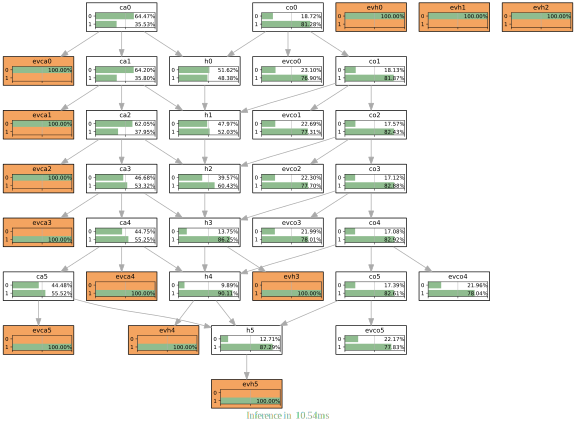

In [76]:
gnb.showInference(dbn,evs={'evca0': 0, 'evh0': 0, 'evca1': 0, 'evh1': 0, 'evca2': 0, 'evh2': 0, 'evca3': 1, 'evh3': 1, 'evca4': 1, 'evh4': 1, 'evca5': 1, 'evh5': 1})

In [77]:
def vals(dbn, ie, nodes=None):
    
    if nodes is None:
        nodes = dbn.nodes()

    exact=[]
    appro=[]

    for node in nodes:
        
        if node.startswith('ev'):
            continue
        # potentials as numpy array
        exact+=ie.posterior(node).tolist()

    return exact

In [78]:
def compareEvidences(dbn, evidences=None, nodes=None):

    results = []

    for evidence in evidences:
        
        print(evidence)

        ie = gum.LazyPropagation(dbn)

        if evidence is not None:
            ie.setEvidence(evidence)

        results.append(vals(dbn,ie, nodes))
        
    print(results)

    plt.plot(*results, label = "Evidencias")

In [79]:
def generate_evidence(index, nodes, observation):
    return {f'ev{node}{index}': observation for node in nodes}

def generate_evidences(nodes, observations):
    
    evidences = {}

    for i in range(T):

        status = observations[i]        
        evidences.update(generate_evidence(i, nodes, status))


    return evidences

In [80]:
def get_posteriors(dbn, nodes, observations, slices):
    
    evidences = {}
    
    nodes_results = {}

    for i in range(slices):
        
        status = observations[i]
        evidences.update(generate_evidence(i, nodes, status))
        
        for node in nodes:
        
            ie = gum.VariableElimination(dbn)
            ie.setEvidence(evidences)
            ie.makeInference()
            a = ie.posterior(f'{node}{i}')

            if node not in nodes_results:
                nodes_results[node] = {False: [a[0]], True: [a[1]]}
            else:
                nodes_results[node][False].append(a[0])
                nodes_results[node][True].append(a[1])
        
    return nodes_results        

In [81]:
def plot_evolution(node, values):
    
    print(values)
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(values[True], label='Verdadeiro', color='tab:green')
    ax.plot(values[False], label='Falso', color='tab:red')
    ax.set_xlabel('Exercícios')
    ax.set_ylabel('Probabilidade')
    ax.set_title(f'{node}')    
    plt.xlim(0, 4)
    plt.xticks([0, 1, 2, 3, 4, 5])
    plt.xticks([0, 1, 2, 3, 4, 5])
    ax.legend()

{False: [0.18181818181818182, 0.04725076808984004, 0.011117808691004096, 0.001566610742356794, 0.00037208608357085655, 0.00021862140141584398], True: [0.8181818181818181, 0.95274923191016, 0.9888821913089958, 0.9984333892576431, 0.999627913916429, 0.9997813785985842]}
{False: [0.4886363636363637, 0.4295917165483632, 0.415639708586483, 0.13552755475546827, 0.06832792040415317, 0.050990028924752975], True: [0.5113636363636364, 0.5704082834516369, 0.584360291413517, 0.8644724452445318, 0.9316720795958469, 0.9490099710752471]}


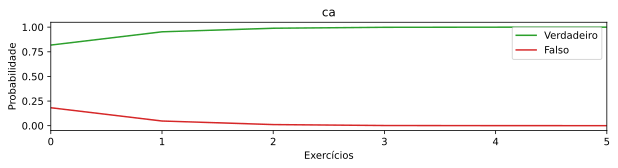

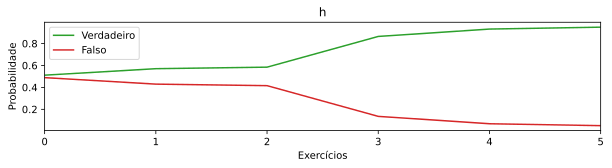

In [82]:
results = get_posteriors(dbn, ['ca', 'h'], [1, 1, 1, 1, 1, 1], 6)

for node, values in results.items():
    plot_evolution(node, values)

{False: [0.18181818181818182, 0.04725076808984004, 0.011117808691004096, 0.001566610742356794, 0.00037208608357085655, 0.020618911178623897], True: [0.8181818181818181, 0.95274923191016, 0.9888821913089958, 0.9984333892576431, 0.999627913916429, 0.9793810888213761]}
{False: [0.4886363636363637, 0.4295917165483632, 0.415639708586483, 0.13552755475546827, 0.06832792040415317, 0.6638344785553242], True: [0.5113636363636364, 0.5704082834516369, 0.584360291413517, 0.8644724452445318, 0.9316720795958469, 0.33616552144467576]}


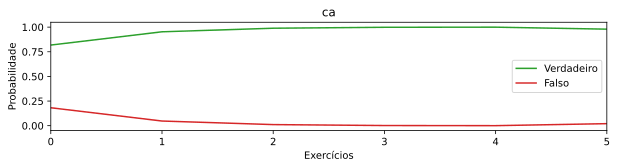

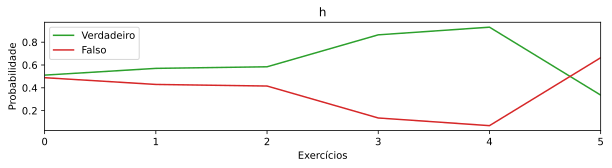

In [83]:
results = get_posteriors(dbn, ['ca', 'h'], [1, 1, 1, 1, 1, 0], 6)

for node, values in results.items():
    plot_evolution(node, values)

{False: [0.18181818181818182, 0.04725076808984004, 0.011117808691004096, 0.001566610742356794, 0.03806944050874178, 0.3142592764797105], True: [0.8181818181818181, 0.95274923191016, 0.9888821913089958, 0.9984333892576431, 0.9619305594912582, 0.6857407235202895]}
{False: [0.4886363636363637, 0.4295917165483632, 0.415639708586483, 0.13552755475546827, 0.7327117648029667, 0.9299640979303417], True: [0.5113636363636364, 0.5704082834516369, 0.584360291413517, 0.8644724452445318, 0.26728823519703315, 0.0700359020696583]}


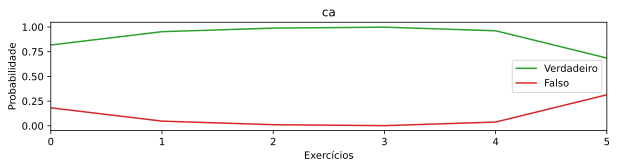

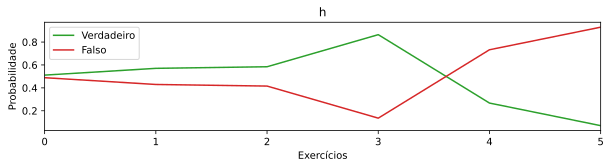

In [84]:
results = get_posteriors(dbn, ['ca', 'h'], [1, 1, 1, 1, 0, 0], 6)

for node, values in results.items():
    plot_evolution(node, values)

{False: [0.18181818181818182, 0.04725076808984004, 0.011117808691004096, 0.1402388353949364, 0.6181931895337257, 0.935355425989701], True: [0.8181818181818181, 0.95274923191016, 0.9888821913089958, 0.8597611646050637, 0.38180681046627435, 0.064644574010299]}
{False: [0.4886363636363637, 0.4295917165483632, 0.415639708586483, 0.8654223214039752, 0.966373724488124, 0.9808991602452729], True: [0.5113636363636364, 0.5704082834516369, 0.584360291413517, 0.1345776785960247, 0.03362627551187595, 0.019100839754727025]}


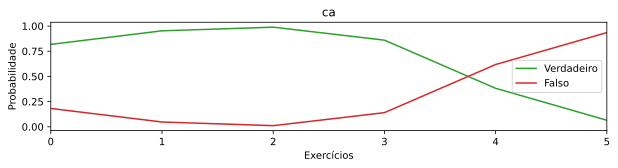

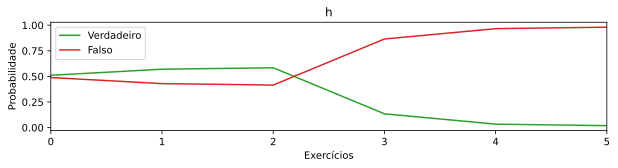

In [85]:
results = get_posteriors(dbn, ['ca', 'h'], [1, 1, 1, 0, 0, 0], 6)

for node, values in results.items():
    plot_evolution(node, values)

{False: [0.18181818181818182, 0.04725076808984004, 0.288124971822374, 0.8453898742018802, 0.9817307395160136, 0.9978291092608874], True: [0.8181818181818181, 0.95274923191016, 0.711875028177626, 0.1546101257981199, 0.018269260483986388, 0.0021708907391125663]}
{False: [0.4886363636363637, 0.4295917165483632, 0.5202223836677502, 0.9499979191718732, 0.9802606932491454, 0.9820243645427865], True: [0.5113636363636364, 0.5704082834516369, 0.4797776163322498, 0.05000208082812685, 0.01973930675085452, 0.01797563545721347]}


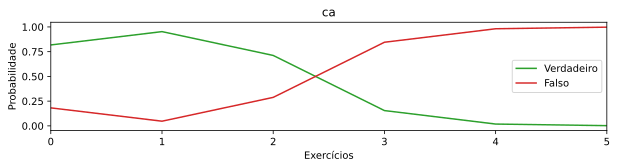

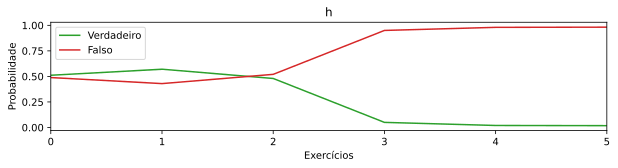

In [86]:
results = get_posteriors(dbn, ['ca', 'h'], [1, 1, 0, 0, 0, 0], 6)

for node, values in results.items():
    plot_evolution(node, values)

{False: [0.18181818181818182, 0.04725076808984004, 0.288124971822374, 0.8453898742018802, 0.9817307395160136, 0.9978291092608874], True: [0.8181818181818181, 0.95274923191016, 0.711875028177626, 0.1546101257981199, 0.018269260483986388, 0.0021708907391125663]}
{False: [0.4886363636363637, 0.4295917165483632, 0.5202223836677502, 0.9499979191718732, 0.9802606932491454, 0.9820243645427865], True: [0.5113636363636364, 0.5704082834516369, 0.4797776163322498, 0.05000208082812685, 0.01973930675085452, 0.01797563545721347]}


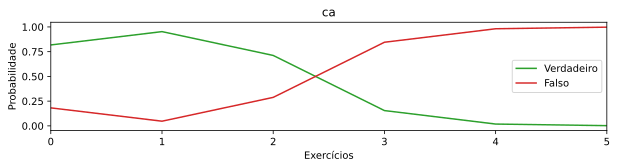

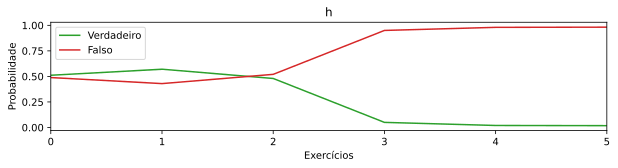

In [87]:
results = get_posteriors(dbn, ['ca', 'h'], [1, 1, 0, 0, 0, 0], 6)

for node, values in results.items():
    plot_evolution(node, values)